# Stock Price Prediction using Artificial Neural Networks

### Final Project in Introduction to Data Science DAT541-1, Dec. 2020
### Group Name : Nordre Hafrsfjord Karsk Og TENNIS

Lars B. Lukerstuen (248800)

Joakim O. Gjermundstad (251365)

Martin Sommerli (258753)

# Abstract

This end project is a demonstration of the core skills that we have developed over the course of this program. These core skills are mainly represented here in the utilization of the python programming language and relevant libraries that are relevant for data science. In this project we have utilized these skills to develop a stock prediction algorithm which incorporates artificial neural networks from the scikit-learn libary, and the retrieval and manipulation of data which was inccorporated from the functionality of the pandas library. The realization of this project ended up being a program which is capable of doing the following: Taking in a specified ticker symbol e.g AAPL as input, then estracts relevant data from several sources namely: market data from yahoo finance, relevant google-search data, and rleevant wikipedia traffick data. Further, this data is fed into an instance of a principal copmponent analysis which selects and sorts out the most relevant combinations of data. In turn, this data is used to train an instance of a multi layer perceptron model. Further, this model is then fed the latest available relevant data which in turn yields a prediction of next day stock closing price.    

# Introduction

The stock market is widely understood to be a complex system consisting of a large amount of factors which affect each other in complex ways. The inherrent complexity in the behaviour of the stock marked has become a source to a great endeavor, namely comming up with the model that can most accurately predict the movements of prices. After all, it is not difficult to see how it would be greatly advantageous to be able to predict stock (or any other asset) price movement ahead of ones competitor. In this endevour a great deal of techniques and methods have been created or lifted from the fields of computer science and statistics, and implemented in order to create more and more accurate models. One such technique is the use of Artificial Neural Networks (ANN), a category of algorithms which utilizes, and was initially inspired by, the arangement of neurons in the brains of living organisms. Essentially, these techniques involves creating a function which consists of a network of smaller functions, which ultimately, can be conceptualized as a network of nodes and vertices with individual weights and biases. These weights and biases are adjusted over prior data, which means that the funciton is trained on data (where we already know the sought output e.g prior accounts of stock prices and data available the day before). Hence, in principle, we would obtain a function that in given a set of data would ouptut a prediction. This in turn leads us to the subject of this projec, which is to implement ANN techniques in python in attempt to predict stock prices. 


# Structure

Our implementation is heavily inspired by the approach of B. Weng [1], which lays out the concept of looking upon differeent sources of infromation which may act as input variables to the model. Namely, google and wikipedia search data, as well as indicator values generated from this afformentioned data as well as the market data. The implementation can be summarized as the following process: First data is obtained, then indicator values are generated and added as features. Then a principal component analysis is performed on the data and we retrieve a "dimension reduced" subset of the data. We can then initialize an instance of our models to be regressed over the data. In our implementation we have incorporated two separate models; multilayer preceptron regression and  a support vector machine model. These models are both fitted to the dimension reduced data, and the fitted models are then fed testing data to evaluate the models, and to predict the next day closing price. 



### Neccessary packages 

In order to be able to run this project, a set of python libraries must be installed.
These libraries can be installed by uncommenting the code below and running. Note that we assume the reader already has installed python and anaconde with its most commonly included packages such as Pandas and Numpy.

In [1]:
#!pip install yfinance
#!pip install pytrends --upgrade
#!pip install --upgrade --user git+https://github.com/GeneralMills/pytrends
#!pip install git+https://github.com/Commonists/pageview-api.git

# Obtaining data

Firstly, we need to obtain data for our training model. We categorize data by marked-, Google-trend- and Wikipedia-visits -data.
### Marked data 
To obtain marked data, we use an unofficial Yahoo! Finance library with the name yfinance. (https://pypi.org/project/yfinance/)
Yfinance utilizes the pandas datareader to download data from Yahoo! Finance in a simpler way.
Using this library, we easily fetch historical marked data by providing a ticker. We mainly use yfinance to get daily stock price for a given interval. Further we will use this data to calculate technical indicators which may be of interest. 

### Google trends data 
Google trend data is obtained by an unofficial Google Trends library with the name pytrends. (https://pypi.org/project/pytrends/)
Pytrends gives an index from 0-100 of popularity in a period. Region is specified to USA, and thus the stocks which is predicted should be listed on a stock exchange in USA.
Google does not allow rapid requests within a short period of time, and data must be requested one month at a time. Because of this, it may take some time to receive data for longer time periods. Once the data is received, the program will save the data locally. This saves time for future use.
Some companies have popular tickers, while others have a popular company name. Therefore, the Google data is requested on ticker, company name and company name without company titles (ex: Inc., Co., Ltd..) separately. 

### Wikipedia visits data 
Wikimedia provides the API-client pageviewapi.(https://pypi.org/project/pageviewapi/)
As Wikimedia is the owner of Wikipedia, it’s possible to receive exact visits on English Wikipedia articles within a period. This gives us a precise dataset of popularity of a company’s Wikipedia-page visits.

### Saving the data 
All the data received from these sources are concatenated, indexed by a day to day date. Rows containing Na-values are dropped. As the marked is not open for trading on weekends and some special occasions, there will be about 253 datapoints per year.


# Generating features

A key aspect of training any model is to have the neccessary amount of data. In our case, we can describe the data as number of samples, and number of features. The feature can in principle be any form of relevant data that one could theroize to be relevant to the movement of a particular stock. Taking inspioration from B.Weng [1], we encorporate effects such as trends or seasonality, and generate several time-series indicators for our retrieved data. The theory for this is that hopefully, these indiactor features encapsulates some of these temporal effects on price movements, and the model will then be able to pick up on these indiactors. We have summerized some of these generators below.


### Stochastic oscillator: 

\begin{equation}
\tag{1}
\% \mathrm{K}  = \frac{C -L14}{H14 -L14}
\end{equation}

Where $C =$ most recent closing price, $H14 =$ highest traded price for last 14 day period, and $L14 =$ lowest traded price for last 14 day period.  



### Larry Williams %R indicator:

The Formula for the Williams %R Is:
\begin{aligned} &\text{Wiliams \%}R=\frac{\text{Highest High}-\text{Close}}{\text{Highest High}-\text{Lowest Low}}\\ &\textbf{where}\\ &\text{Highest High} = \text{Highest price in the lookback}\\ &\text{period, typically 14 days.}\\ &\text{Close} = \text{Most recent closing price.}\\ &\text{Lowest Low} = \text{Lowest price in the lookback}\\ &\text{period, typically 14 days.} \end{aligned} 
​	  
Wiliams %R= 
Highest High−Lowest Low
Highest High−Close
​	 
where
Highest High=Highest price in the lookback
period, typically 14 days.
Close=Most recent closing price.
Lowest Low=Lowest price in the lookback
period, typically 14 days.


### Relative Strenght Index (RSI):

The Formula for the Relative Strenght Index is:
\begin{aligned} &\text{RSI} = {100} - \frac{100}{{1} + {\text{Previous Average Gain}\over\text{- Previous Average Loss}}}\\ &\textbf{where}\\ &\text{Previous Average Gain} = \text{Average price in a }\\ &\text{period, typically 14 days.}\\ &\text{Previous Average Loss} = \text{Average loss in a }\\ &\text{period, typically 14 days.} \end{aligned} 
​	  
RSI ia a indicator that tells if a stock is overbought or oversold. The indicator operates wiyhin values form 0 to 100. In general the stock is conscidered 
overbougth when the induicator goes above 70, and oversold as the indicator goes below 30. Indicator values at 80 and 20 is also useful in some cases.
​	 

Prevoius average gain is typically in a lookback
period of 14 days.
This is also the case in previous average loss. The lookback period is 
equal for both parameters.

### Moving Average:

The Formula for the Moving Average is:
\begin{aligned} &\text{MA(n)$_t$} = \frac{\text{V$_t$}}{\text{n}} + \frac{\text{V$_t$$_-$$_1$}}{\text{n}} + ..... + \frac{\text{V$_t$$_-$$_n$$_+$$_1$}}{\text{n}} \end{aligned}

This is a parameter that calculates the average over a time interval. This is a common indicator in technical analysis,

### Exponential Moving Average

The Formula for the Exponential Moving Average is:
\begin{aligned} &\text{EMA(n)$_t$} = {\text{V$_t$} - {\text{MA(n)$_t$}}} * (\frac{2}{\text n+1}) + {\text{MA(n)$_t$$_-$$_t$}} \end{aligned} 
The Exponential Moving Average is a technical indicator that tracks a stock or commodity over time. This particular moving average is a weighted average that gives more weight to the recent data, especially if the time window is short. The idea of the parameter is to be an improvement of the simple moving average by giving weight to recent data. In this project the time window of the EMA is short. https://www.investopedia.com/ask/answers/122314/what-exponential-moving-average-ema-formula-and-how-ema-calculated.asp

### Disparity:
The Formula for the Disparity is:
\begin{aligned} &\text{Disparity(n)$_t$} = \frac{\text{V$_t$}}{\text{MA(n)$_t$}} * {100} \end{aligned}

The Disparity is a parameter that shows the volume of the Stock (the value of the stock to it's moving average), Google and Wikipedia data to it's moving average

### Momentum 1:
The Formula for the Momentum 1 is:
\begin{aligned} &\text{Momentum1$_t$} = \frac{\text{V$_t$}}{\text{V$_t$$_-$$_5$}} * {100} \end{aligned}

In our calculations, Momentum 1 is the current value of the parameter compared to the value of the given parameter 5 days ago. 
### Momentum 2:

The Formula for the Momentum 2 is:
\begin{aligned} &\text{Momentum2$_t$} = ({\text{V$_t$} - {\text{V$_t$$_-$$_5$}}}) * {100} \end{aligned} 
Momentum 2 is used to calculate the Rate Of Change, and that's the purpose of doing the Momentum 2 calculation. 

### Rate Of Change:
The Formula for the Rate Of Change is:
\begin{aligned} &\text{ROC$_t$} = \frac{\text{V$_t$}}{\text{Momentum2$_t$}} * {100} \end{aligned}
The Rate of Change is the calculation of a rate that shows how rapid the increase or decrease at the particular time given in the data. 

## Scenarios 

An interesting aspect to this project is the effect of the different data tha we collect on the overall accuracy of the prediction model. We have thus chosen to run different scenarios, whhich means that we generate several instances of data on which we fit the models. The scenarios can be summarized as follows:

1. Market data only (Stock price; Open, Close, High, Low)
2. Market data and wikipedia viewcounts
3. Market data and google trends data
4. All data


## Principal component analysis:
Principal component analysis is a technique used to reduce the amount of necessary data for fitting a predictive model. A PCA mailny identifes the principal components of the data e.g an orthonormal basis for the data in which the basis components denote othagonal components of the data which each optimize for the amount of total explained varioance, ranked in order of the most impactfull to least impactfull. E.g the first principal compnent constitutes the greatest amount of variance in the data, the nex component conistutes the second most variance, and so on onwards until the entire data sample is represented. One can then reduce the size of the sample by disregarding the principal components of least significance. 

PCA can be broken down into the following steps: 

1) Standarization
(Z-score)

2) Compute Covariance Matrix

3) Compute Eigen-vectors of covariance matrix.
The eigen vectors can be interpeted as the principal components e.g the combinations of features which maximise variance, and the eigen value corresponds to the amount of total variance carried in each principal component. Hence we can rank the principal components in the order of highest eigenvalue

4) Find feature vectors.
The feature vectors is a matrix conisting of the eigen vectors of the components we decide to keep in decending order. 

5) Obtain the new "better suited" data:
The new data is obtained by matrix multtiplication
\begin{equation}
NewData = featureVector^{T} \cdot NormalizedOldData^{T}
\end{equation}

In this project we have utilized the PCA functionality of the Scikit-Learn-decomposition package. 

## Multi-Layered Perceptron Regressor
The Multi-Layered perceptron model consist of layers of preceptrons e.g nodes in a network that are able to take in some input and which produces an output if a certain criterion is met. This model is commonly used in a classification, where the output of the model is discrete values e.g image recognition such as classifying pictures of dogs and cats or recognizing handwritten digits. However, the same node and layer structrue can be adapted into a non discrete case, which in simple terms becomes a large network of linear regressions.  

We use Scikit-Learn's MPLRegressor, hwich implements a multi-layer perceptron algorithm that trains using backpropogation. 


## Support Vector Machine (SVM)
Support Vector Machine, the second model of this project, is likewise MLP a learning model which is capable of classification and regression. Somewhat more complex, the support vector machine essentially construct "hyperplanes" which onto the data can be mapped for either classification or regression. As with MLP, this is also implemented through the Sklearn packages. 

# Results 



Scenario 1
Mean squared error MLP: 741.7091790821624
Mean squared error SVM: 752.2685842166132
MLP-predicts close price: 1846.5370042098968
SVM-predicts close price: 1740.2826665637094

Scenario 2
Mean squared error MLP: 437.1560009074274
Mean squared error SVM: 683.9339901000068
MLP-predicts close price: 1820.052302932177
SVM-predicts close price: 1735.984356869676

Scenario 3
Mean squared error MLP: 268.9884468585428
Mean squared error SVM: 741.011891916236
MLP-predicts close price: 1836.6995409448743
SVM-predicts close price: 1707.8796344228222

Scenario 4
Mean squared error MLP: 225.5174275944128
Mean squared error SVM: 745.4711521098393
MLP-predicts close price: 1809.8042506395293
SVM-predicts close price: 1712.2967153800605


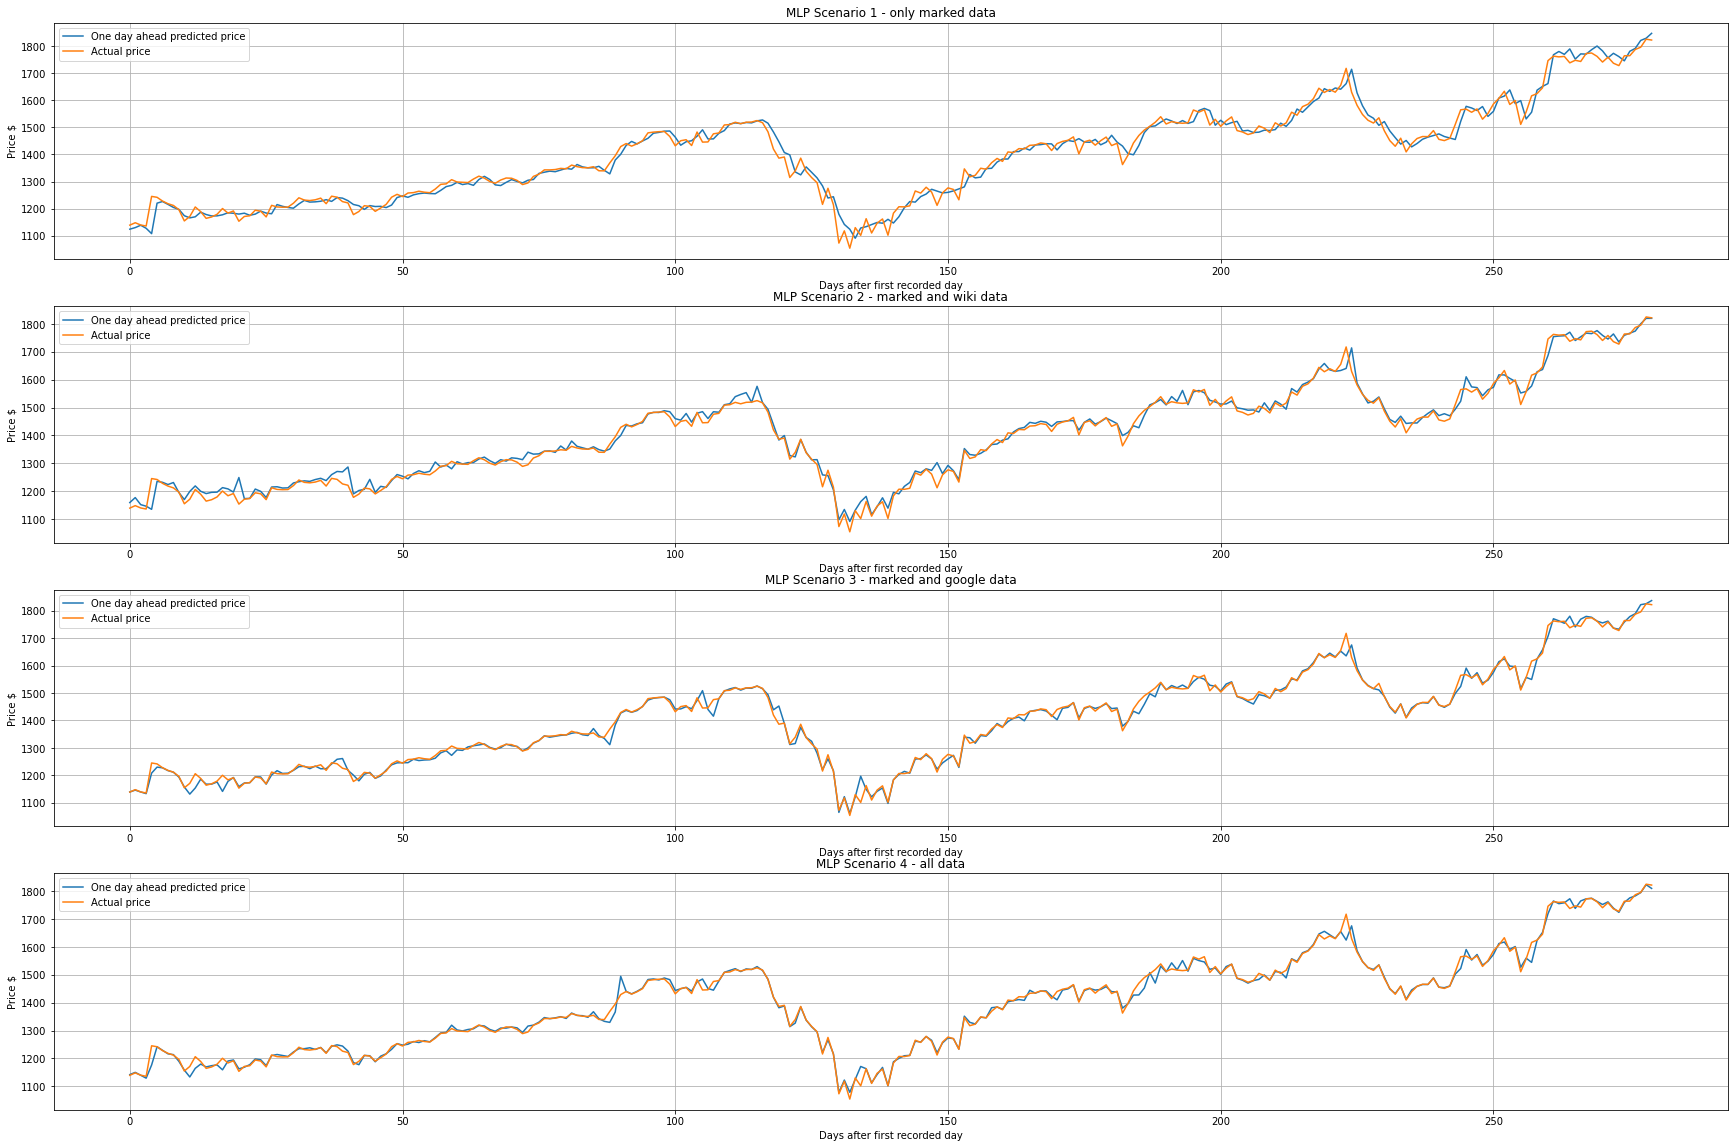

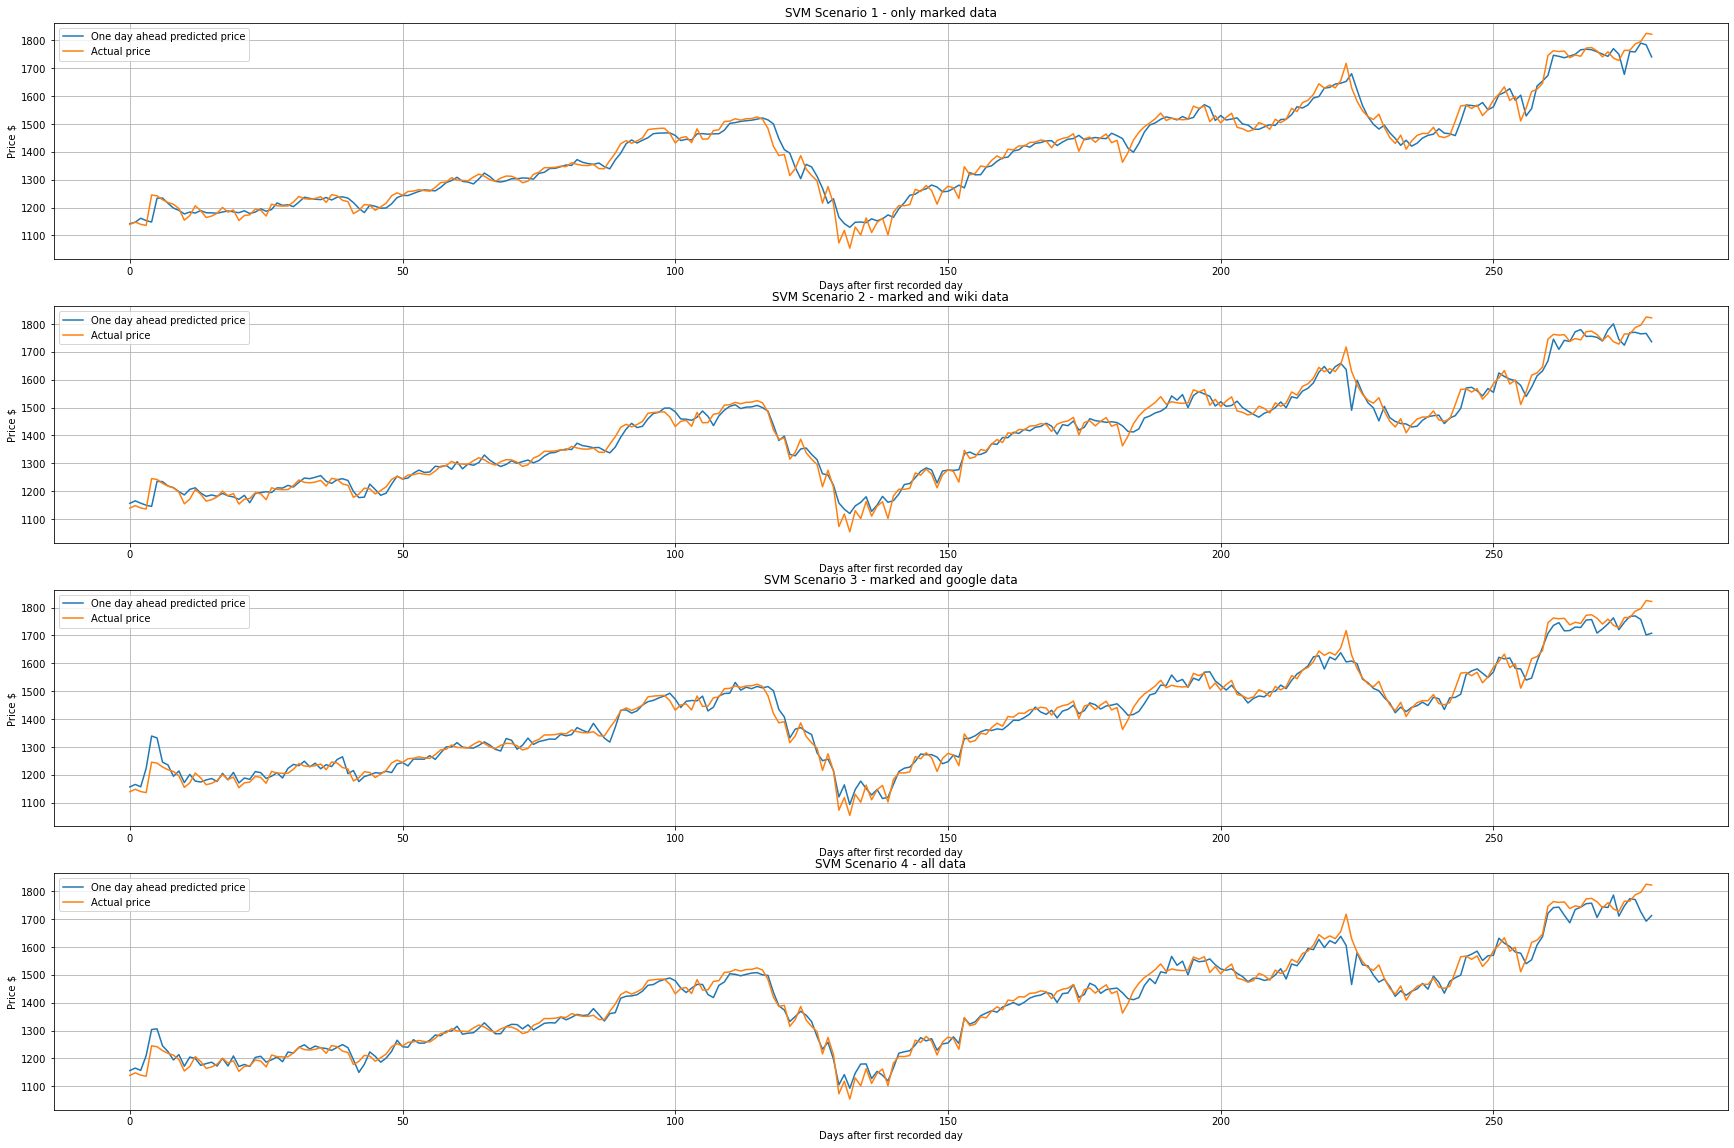

In [1]:
import main 

main.run(ticker = 'GOOGL')



First of let's explain the output:
First is a printout of the predicted close price for both ANN models, and for each scenario, with their respective mean square errors calculated from running the predicviton over testing data. Secondly, we plot the predictions for each model in each scenario. 

The most accurate result when running with ticker = "MSFT" (Microsoft), is the predictions from the MLP model over scenario 3, with a mean square error of 3.38, which predicts a closing price of 214.77$. Running further simulations we can note the following: The VSM model seem to be the least accurate of the two, with often higher scores of MSE, we can also se from the plots that this model has a tendency to spike. We can also observe this in some instances of the mlp model to, but to less of an extent. Another important aspect to note is the fact that more data does not necessarily equal more accurate results, as some examples we see better accuracies in the scenarios with less data. 

# Discussion 

-PCA - litt problematisk: vet ikke hvilke X data som er viktigst.
- MIster mye data med nan
- Mister accuracy med mer data 
- S

A number of factors are important to consider for this project. 

Discussion 
In this project we tried to predict the stock price the next day by using machine learning techniques. To achieve this, we had to gather data from different sources. This resulted in different python functions that gather data from a given stock ticker. We decided to collect search history from Wikipedia and Google to compliment the general marked data. All the data is collected and stored in a data frame, which makes it easy to manipulate and scale to implement in neural network models.
Since the stock market is only open on weekdays, a lot of valuable information might get lost by using the dropna() ability on the pandas data frame. This means that valuable search history information gets dropped, and the lack of this data might contribute to an overall error in the model. There’s also a possibility that it might spread to some useful datasets during weekdays since search history data might be flawed and remove other useful data from the pandas data frame.   
Furthermore, during the Principal Component Analysis (PCA) the model have trouble discarding duplicated/similar datasets. We could clearly see more accurate results using a trial-and-error approach on n components but decided to use the implemented “mle” feature due to using two different machine learning techniques. This might be a problem since it’s a possibility that the models get to much information, and therefore gets less accurate. By simulating multiple scenarios, we can see a clear trend that the models are more accurate with less data values. One explanation of this might be that a larger data volume makes it harder to predict the actual stock price due to “noise”. Our results indicate that this might be the case. Another explanation is that the lack of data, and the same number of layers and neurons in the model makes it overfit, and therefore not valid.  


# Reflection

Overall the groups is pleased with the way that responsibilites and tasks were allocated, and we feel that all three contributed fairly. At the beggining, the group members acted rather autonomously, each finding their own task to work on which eventually would be added to the final project. These intial tasks conisted mainly of finding out how to import data, as well as reasearching and testing out eventual implementations of ANN models. However, as the project progressed, the tasks were less often split into individual efforts, and we can say that the bulk of the projectr was handled in a style tha could be described as a tri-fold rolling pair programming style. That is to say, one group member acted as the "hands" typing the solutions into the main project while the other two both helped to come up with solutions as well as solving smaller problems besides the main project, and of course, the roles in this setup rotated. Because of this very much collaborative way of handling the project, we found it difficult to segment specific parts of the project which can be credited to a specific group member. 

The group is somewhat happy with the results of the project. Although the resutls were not necessarily "accurate", we were still in a sense able to create a stock predictor alghorithm. 

# Conclusion

# Refrences

[1] B. Weng, Application of machine learning techniques for stock market prediction, Auburn University, Auburn, Alabama  May 6, 2017.

[2] SciKit-learn.org: https://scikit-learn.org/stable/


Surname, Initial(s), ‘Page Title’, Website Name [website], date of publication, URL, accessed date.


[3] https://school.stockcharts.com/doku.php?id=technical_indicators:williams_r

[4] MITCHELL, C, Williams %R Definition and Uses, Updated Nov 19, 2020 https://www.investopedia.com/terms/w/williamsr.asp 

[5] https://pandas.pydata.org/pandas-docs/stable/user_guide/computation.html#stats-moments-exponentially-weighted

[6] Vasulka M, 'Compute RSI for stocks with python (Relative Strength Index)', https://tcoil.info/compute-rsi-for-stocks-with-python-relative-strength-index/

# Non reference links

[7] https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html?highlight=pca#sklearn.decomposition.PCA